In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from glob import glob
from os import path as ospath
from pathlib import Path

In [12]:
folders = glob(ospath.join("..", "from_arc", "*_final"))

In [32]:
dfs = {}
for folder in folders:
    model_name = Path(folder).stem
    version_folder = glob(ospath.join(folder, "*"))[0]
    dfs[model_name] = pd.read_csv(ospath.join(version_folder, "metrics.csv"))
dfs["segan_2d_final"]

,train_opt0_loss_step,train_opt0_dsc_0_step,train_opt0_dsc_1_step,train_opt0_dsc_2_step,train_opt1_loss_step,train_opt1_dsc_0_step,train_opt1_dsc_1_step,train_opt1_dsc_2_step,epoch,step,train_opt0_loss_epoch,train_opt0_dsc_0_epoch,train_opt0_dsc_1_epoch,train_opt0_dsc_2_epoch,train_opt1_loss_epoch,train_opt1_dsc_0_epoch,train_opt1_dsc_1_epoch,train_opt1_dsc_2_epoch
0,0.279903,0.748060,0.417591,0.758381,0.253942,0.796754,0.267121,0.766506,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.286826,0.846940,0.567265,0.798335,0.263384,0.877099,0.672814,0.827865,0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5,0.281976,0.633032,0.348434,0.482623,0.250394,0.783415,0.418078,0.640975
3,0.293508,0.892645,0.766283,0.864256,0.270923,0.894021,0.796345,0.874740,1,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.275868,0.915696,0.857456,0.926136,0.257850,0.922696,0.885284,0.948074,1,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,0.120008,0.957124,0.967034,0.987018,0.111490,0.959821,0.968492,0.987623,174,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174,1049,0.134493,0.948112,0.967972,0.989277,0.133474,0.948007,0.968108,0.989210
525,0.141517,0.944105,0.966706,0.989434,0.140032,0.944480,0.966903,0.989603,175,1052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526,0.130054,0.946463,0.966776,0.993502,0.123768,0.946728,0.966532,0.993658,175,1055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


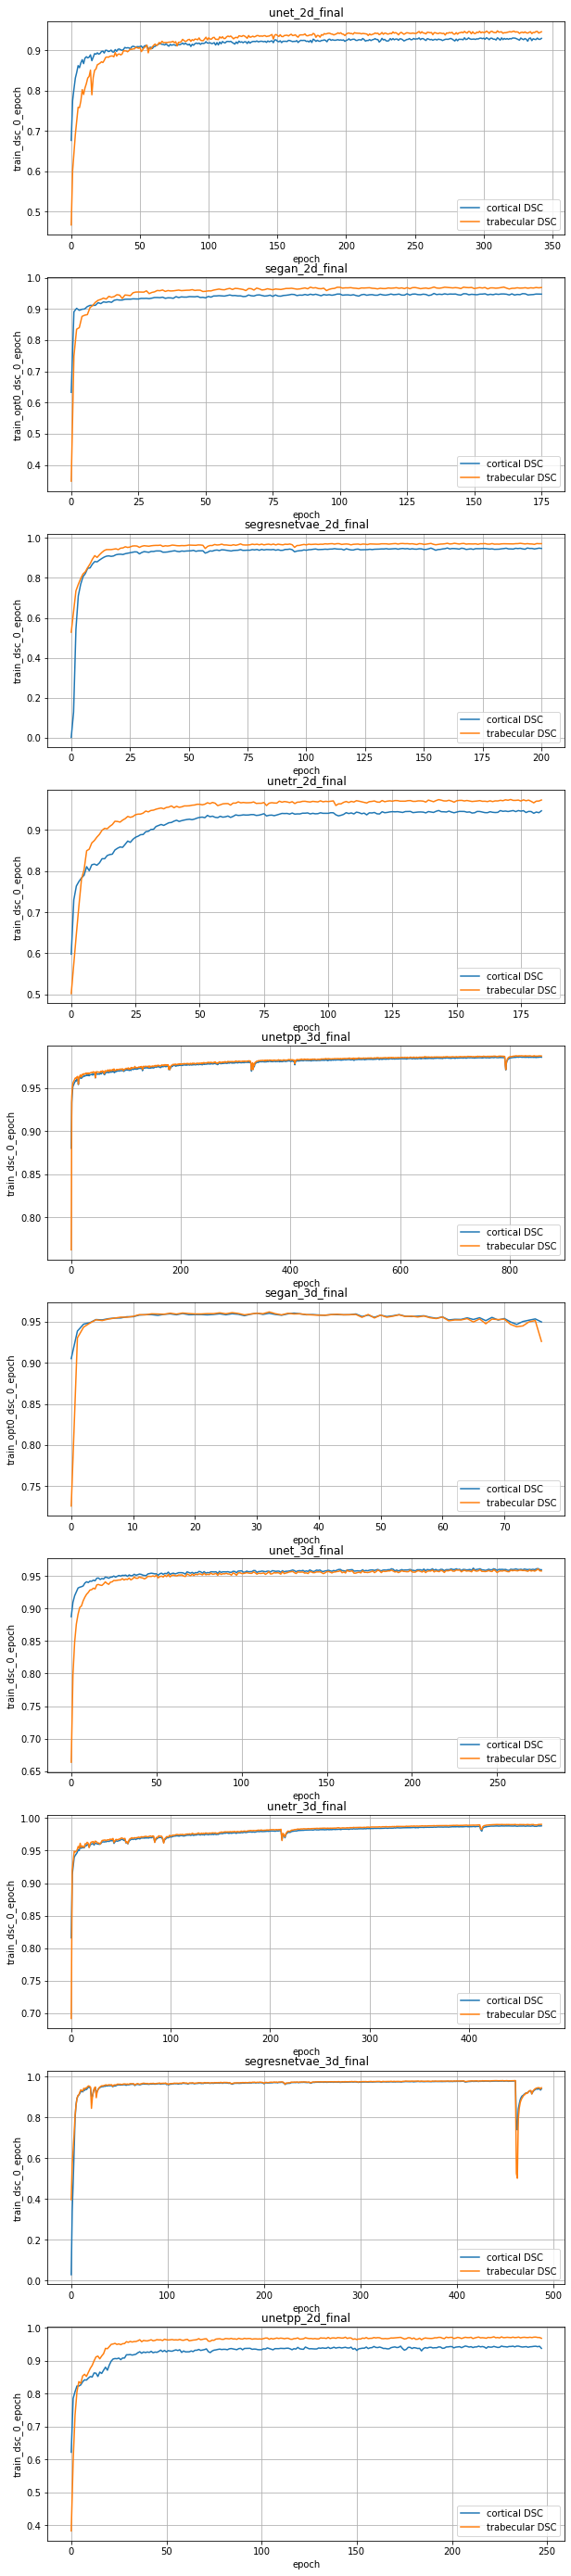

In [41]:
num_models = len(dfs)

fig, axs = plt.subplots(num_models, 1, figsize=(10,5*num_models), sharey=False)

for (ax, (model_name, df)) in zip(axs, dfs.items()):
    
    prefix = "train_opt0" if "segan" in model_name else "train"
    
    ax.set_title(model_name)
    ax.grid()
    
    sns.lineplot(ax=ax, data=df, x="epoch", y=f"{prefix}_dsc_0_epoch", label="cortical DSC")
    sns.lineplot(ax=ax, data=df, x="epoch", y=f"{prefix}_dsc_1_epoch", label="trabecular DSC")
    
    ax.legend()

plt.show()